## Loading in the libraries for regression.

In [1]:
# Old libraries that we know and love.
import numpy as np
import matplotlib.pylab as py
import pandas as pa
%matplotlib inline

# Our new libraries.
from sklearn import cross_validation, linear_model, feature_selection, metrics
import mayavi.mlab as mlab

# Supervised Regression

## Linear Regression

In [4]:
# Read in the data using 
Xy = pa.read_csv('Advertising.csv')

In [5]:
# Take a look at the contents.
Xy

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [6]:
# Normalize data
# We do this to make plotting and processing easier.  Many Sklearn functions do this
# for you behind the scenes, but we do it explicitly.
# Note, that this is a cousing of the physics idea of nondimensionalization.  Think
# about the case where TV was measured in millions, while Radio was measured in
# thousands.  One could imagine TV totally washing out the effect of Radio.
# In effect, after normalization, each predictor now stands on an "even footing".
#
# Is this always a good idea?
Xy = (Xy-Xy.min())/(Xy.max()-Xy.min())
Xy

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,0.000000,0.775786,0.762097,0.605981,0.807087
1,0.005025,0.148123,0.792339,0.394019,0.346457
2,0.010050,0.055800,0.925403,0.606860,0.303150
3,0.015075,0.509976,0.832661,0.511873,0.665354
4,0.020101,0.609063,0.217742,0.510994,0.444882
5,0.025126,0.027054,0.985887,0.656992,0.220472
6,0.030151,0.192087,0.661290,0.204046,0.401575
7,0.035176,0.404126,0.395161,0.099384,0.456693
8,0.040201,0.026716,0.042339,0.006157,0.125984
9,0.045226,0.673318,0.052419,0.183817,0.354331


In [7]:
# Select out our predictor columns and our response columns
X = Xy.ix[:,['TV']]
y = Xy.ix[:,['Sales']]

In [24]:
# Last time we did this by hand, now we are smarter and use the sklearn 
# routine.  This routine splits data into training and testing subsets.
cross_validation.train_test_split([1,2,3,4,5],
                                  [6,7,8,9,10],
                                  test_size=0.4,
                                  random_state=5)

[[2, 3, 4], [5, 1], [7, 8, 9], [10, 6]]

In [25]:
# Now we do it for the real data.
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,
                                                                  y,
                                                                  test_size=0.8)

In [26]:
# Let's take a quick look at the data.
X_train

,TV
52,0.729456
119,0.063240
84,0.719648
173,0.567129
103,0.633074
13,0.327359
58,0.710517
18,0.231654
142,0.743321
82,0.252283


In [27]:
# Run the solver
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
# There are the slope and intercept of the line we computed.
# Beta_0
print reg.intercept_
# Beta_1
print reg.coef_

[ 0.19788723]
[[ 0.57698067]]


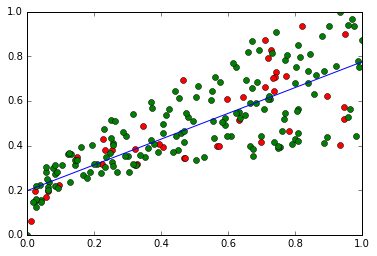

In [29]:
# Do a plot
plotX = np.linspace(0,1,100)
plotY = reg.predict(np.matrix(plotX).T)
py.plot(X_train,y_train,'ro')
py.plot(X_test,y_test,'go')
py.plot(plotX,plotY,'b-')

In [30]:
# Use the metrics package to print our errors.  See discussion on slides.
print 'training error'
print metrics.mean_squared_error(y_train,reg.predict(X_train))
print 'testing error'
print metrics.mean_squared_error(y_test,reg.predict(X_test))

training error
0.0181351494343
testing error
0.0159325184683


<b>Back to slides.</b>

## Multi-dimensional regression

In [31]:
# Select out our predictor columns and our response columns
X = Xy.ix[:,['TV','Radio']]
y = Xy.ix[:,['Sales']]

# Select subsets for training and testing
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,
                                                                  y,
                                                                  test_size=0.8,
                                                                  random_state=123)

In [32]:
# Plot the data to get a feel for it.
mlab.clf()
mlab.points3d(X_train.ix[:,0]/X.ix[:,0].std(), 
              X_train.ix[:,1]/X.ix[:,1].std(), 
              y_train.ix[:,0]/y.ix[:,0].std(),
              color=(1,0,0), scale_factor=0.2)
mlab.points3d(X_test.ix[:,0]/X.ix[:,0].std(), 
              X_test.ix[:,1]/X.ix[:,1].std(), 
              y_test.ix[:,0]/y.ix[:,0].std(),
              color=(0,1,0), scale_factor=0.2)
mlab.axes()
mlab.show()

In [33]:
# Run the solver
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
# Create data for plotting
size=10
xPlot,yPlot = np.meshgrid(np.linspace(0,1,size),
                          np.linspace(0,1,size))
np.array([xPlot.flatten(),yPlot.flatten()])
zPlot = reg.predict(np.transpose(np.array([xPlot.flatten(),
                                           yPlot.flatten()])))
zPlot = zPlot.reshape([size,size])

In [35]:
# Since we will be plotting many times, we 
def myPlot(reg,X_train,y_train,X_test,y_test,xPlot,yPlot,zPlot,size=10,scale_factor=0.05):
    mlab.clf()
    mlab.points3d(X_train.ix[:,0], 
                  X_train.ix[:,1], 
                  y_train.ix[:,0],
                  color=(1,0,0), scale_factor=scale_factor)
    mlab.points3d(X_test.ix[:,0], 
                  X_test.ix[:,1], 
                  y_test.ix[:,0],
                  color=(0,1,0), scale_factor=scale_factor)
    mlab.mesh(xPlot,yPlot,zPlot,color=(0,0,1))
    mlab.axes()
    mlab.show()
    
myPlot(reg,X_train,y_train,X_test,y_test,xPlot,yPlot,zPlot)

In [36]:
# Use the metrics package to print our errors
print 'training error'
print metrics.mean_squared_error(y_train,reg.predict(X_train))
print 'testing error'
print metrics.mean_squared_error(y_test,reg.predict(X_test))

training error
0.00301813848558
testing error
0.00529973748665


<b>Back to the notes.</b>